In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the file

In [2]:
data=pd.read_csv("hotel_bookings.csv")

In [3]:
print("shape of data: ",data.shape)
print(data.hotel.nunique())

shape of data:  (119390, 32)
2


<b>Here 2 means- resort hotel and  city hotel<b>

missing value

In [4]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

cleaning the data

In [5]:
def data_clean():
  data.fillna(0,inplace=True)
  print(data.isnull().sum())
data_clean()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
list=['adults', 'children', 'babies']
for i in list:
  print('{} has unique values as{}'.format(i,data[i].unique()))

adults has unique values as[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as[ 0.  1.  2. 10.  3.]
babies has unique values as[ 0  1  2 10  9]


In [8]:
pd.set_option('display.max_columns',32)
filter=(data['children']==0) & (data['adults']==0) & (data['babies']==0)
data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [9]:
datas=data[~filter]
datas

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [10]:
country_wise_data=datas[datas['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no of guests']
country_wise_data

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#!pip install folium

In [13]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [14]:
#!pip install plotly

In [15]:
import plotly.express as px

In [16]:
data2=datas[datas['is_canceled']==0]


In [17]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

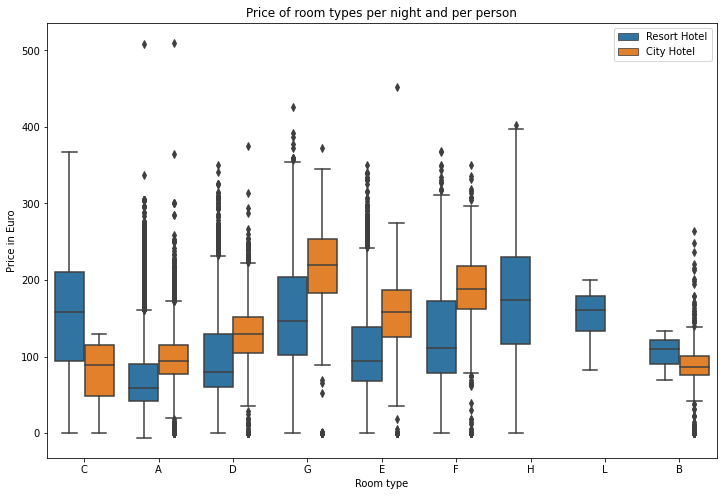

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)
plt.title('Price of room types per night and per person')
plt.xlabel('Room type')
plt.ylabel('Price in Euro')
plt.legend()
plt.show()


price per night vary over year

In [19]:
data_resort=datas[(datas['hotel']=='Resort Hotel') & (datas['is_canceled']==0)]
data_city=datas[(datas['hotel']=='City Hotel') & (datas['is_canceled']==0)]

In [20]:
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [21]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [22]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [23]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['months','price_for_resort','price_for_city_hotel']
final

,months,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [24]:
#!pip install sort-dataframeby-monthorweek

In [25]:
#!pip install sorted-months-weekdays

In [26]:
import sort_dataframeby_monthorweek as sd

In [27]:
def sort_data(data,colname):
  return sd.Sort_Dataframeby_Month(data,colname)

<b>This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.<b>

In [28]:
import warnings
warnings.filterwarnings('ignore')

Analyzing of hotel demands on which most busy month and guests are high?


In [29]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['months','no of guests']
rush_resort

,months,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [31]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['months','no of guests']
rush_city

,months,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [32]:
final_rush=rush_resort.merge(rush_city,on='months')
final_rush.columns=['month','no of guest in resort','no of guest in city']
final_rush

,month,no of guest in resort,no of guest in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [33]:
final_rush=sort_data(final_rush,'month')
final_rush

,month,no of guest in resort,no of guest in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<b>Conclusion
 The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.</b>

Selecting important features using machine learning

In [34]:
datas.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [35]:
datas.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [36]:
co_relation=datas.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [37]:
co_relation.abs()

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
stays_in_weekend_nights           0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                            0.032569
is_repeated_guest                 0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled    0.057365
booking_changes                   0.144832
agent                             0.046770
company                           0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces       0.195701
total_of_special_requests         0.234877
Name: is_canceled, dtype: float64

In [38]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [39]:
datas.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

#fetching numerical and categorical columns

In [40]:
list_not=['days_in_waiting_list','arrival_date_year']
list_not

['days_in_waiting_list', 'arrival_date_year']

In [41]:
num_features=[col for col in datas.columns if datas[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [42]:
datas.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
cat_not=['arrival_date_year','assigned_room_type','booking_changes','reservation_status','country']

In [44]:
cat_features=[col for col in datas.columns if datas[col].dtype=='O' and col not in cat_not]

In [45]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

<i><h2>Extracting Derived features such as date </h2></i>

In [46]:
data_cat=datas[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [47]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [48]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [49]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


In [50]:
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day

In [51]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [52]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [53]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [54]:
data_cat['cancellation']=data['is_canceled']
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [55]:
data_cat['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

<i><h2>Handling categorical values</i></h2> 

<i>converting categorical data into numerical data using mean encoding technique</i>

In [56]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [57]:
data_cat.groupby(['hotel'])['cancellation'].mean().reset_index()

,hotel,cancellation
0,City Hotel,0.417859
1,Resort Hotel,0.277674


In [58]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())
    print('************************************************************')

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64
************************************************************
arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64
************************************************************
meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64
************************************************************
market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


In [59]:
for col in cols:
    dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict)

In [60]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [61]:
dataframe=pd.concat([data_cat,datas[num_features]],axis=1)
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [62]:
dataframe.drop('is_canceled',axis=1,inplace=True)

In [63]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


<i><h2>Handling Outliers</h2></i>

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

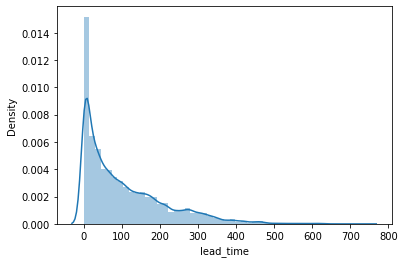

In [64]:
sns.distplot(dataframe['lead_time'])

In [65]:
import numpy as np

def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])


In [66]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

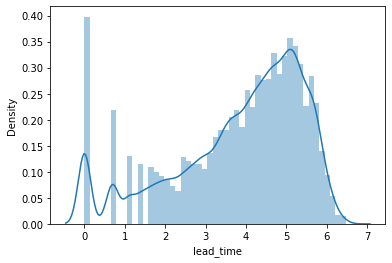

In [67]:
sns.distplot(dataframe['lead_time'].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

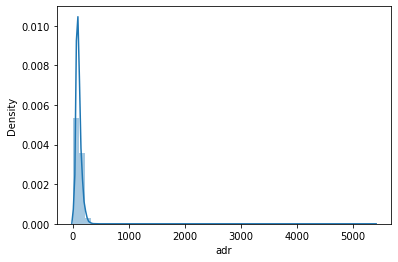

In [68]:
sns.distplot(dataframe['adr'])

In [69]:
handle_outlier('adr')

<AxesSubplot:xlabel='adr', ylabel='Density'>

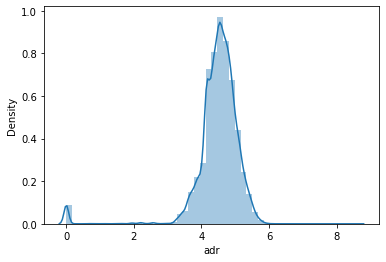

In [70]:
sns.distplot(dataframe['adr'].dropna())

<i><h2>Selecting important features</h2></i>

In [71]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
cancellation                      0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [72]:
dataframe.dropna(inplace=True)

In [73]:
dataframe=dataframe.drop('company',axis=1)
dataframe=dataframe.drop('arrival_date_week_number',axis=1)
dataframe=dataframe.drop('arrival_date_day_of_month',axis=1)

In [74]:
y=dataframe['cancellation']
x=dataframe.drop('cancellation',axis=1)


In [75]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [76]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0)) # more alpha i,e, 1 less no of feature selected

In [77]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [78]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True])

In [79]:
cols=x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'lead_time',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [80]:
selected_feat=cols[feature_sel_model.get_support()]

In [81]:
print('total_features {}'.format(x.shape[1]))
print('selected_features {}'.format(len(selected_feat)))

total_features 25
selected_features 14


In [82]:
selected_feat

Index(['deposit_type', 'year', 'month', 'day', 'lead_time', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [83]:
x=x[selected_feat]


<i><h2>Applying Machine Learning Algorithm </h2></i>

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model=LogisticRegression()

In [88]:
model.fit(x_train,y_train)

LogisticRegression()

In [89]:
y_pred=model.predict(x_test)

In [90]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<i><h3></i></h3>

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,y_pred)

array([[15820,  2864],
       [ 4460,  6659]], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test,y_pred)

0.7542529275576284

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
score=cross_val_score(model,x,y,cv=10)

In [97]:
score.mean()

0.7357918812833255

In [98]:
#pip install xgboost

<i>As it is seen there is not so accurate prediction</i>

<i><h3>Appliying multiple algorithm on the model and checking its accuracy</h3></i>

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [100]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('XGBClassifier', XGBClassifier()))

In [101]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[15820  4460]
 [ 2864  6659]]
0.7542529275576284


Naive Bayes
[[8789 1314]
 [9895 9805]]
0.6238969231285441


RandomForest
[[18010  2014]
 [  674  9105]]
0.909807737476093


Decision Tree
[[16615  1913]
 [ 2069  9206]]
0.8663892896688253


KNN
[[17190  2632]
 [ 1494  8487]]
0.8615575613193303


XGBClassifier
[13:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[17800  2629]
 [  884  8490]]
0.8821259604737778




In [102]:

model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [103]:
accuracy_score(pred,y_test)


0.909103110425125

In [104]:
x_test.head()

,deposit_type,year,month,day,lead_time,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
28504,0.28402,2016,10,5,5.837730,2,0.0,0,0,1,201.0,3.768153,0,0
17997,0.28402,2016,1,22,0.000000,1,0.0,1,7,0,88.0,3.433987,0,0
41204,0.28402,2015,7,6,3.688879,2,0.0,0,0,0,6.0,4.629863,0,0
94418,0.28402,2016,8,4,5.267858,2,0.0,0,0,0,27.0,4.293878,0,1
92948,0.28402,2017,1,30,3.044522,1,0.0,0,7,0,0.0,4.219508,1,0


In [105]:
x_test.dtypes

deposit_type                      float64
year                                int64
month                               int64
day                                 int64
lead_time                         float64
adults                              int64
children                          float64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [106]:
deposit_type=float(input("Enter deposit type: "))
year=int(input("Enter year"))
month=int(input("Enter month: "))
day=int(input("Enter day: "))
lead_time=float(input("Enter lead_time: "))
adults=int(input("Enter number of adults= "))
children=float(input("Enter number of children: "))
previous_cancellations=int(input("Enter number of previous cancellations: "))
previous_bookings_not_canceled=int(input("Enter number of previous_bookings_not_canceled: "))
booking_changes=int(input("Enter number of changes done in booking: "))
agent=float(input("Enter agent id: "))
adr=float(input("Enter adr: "))
required_car_parking_spaces=int(input("Enter number of required_car_parking_spaces: "))
total_of_special_requests=int(input("Enter any number od special requests: ")) 

In [107]:
x_test.columns

Index(['deposit_type', 'year', 'month', 'day', 'lead_time', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [108]:
mydata=[[deposit_type, year, month, day, lead_time, adults,
       children, previous_cancellations, previous_bookings_not_canceled,
       booking_changes, agent, adr, required_car_parking_spaces,
       total_of_special_requests]]



In [109]:
mydata

[[0.28154, 2019, 5, 12, 3.555, 4, 5.0, 2, 3, 1, 2.0, 3.87666, 6, 2]]

In [110]:
mydata_predict=model.predict(mydata)

In [111]:
if mydata_predict==0:
   print("No, Ticket will not be canceled.")
else:
    print("Yes, Ticket will cancel.")

No, Ticket will not be canceled.


lead_time= Number of days that elapsed between the entering date of the booking into the PMS and the arrival date<br> 
adr=Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights 
